<a href="https://colab.research.google.com/github/markorakic777/PPPO/blob/main/Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration - Istraživanje podataka
u ovom deku vrši se:


1.    Učitavanje podataka
2.    Prebrojavanje podataka u svakoj kategoriji da bi se ispitala njihova balansiranost
3.    Vizualizacija predstavnika svake kategorije
4.    Vizualizacija distribucije podataka unutar svake kategorije




In [ ]:
import os
# os je biblioteka koja nam omogucava da pozivamo funkcije operativnog sistema
import glob
# glob je bibliotek koja nam olaksava rad sa putanjama.


#check path je funkcija koja ce se koristii u daljem radu. ona proverava da li postoji fajl/folderu i da li imamo prava pristupa fajlu/folderu
def check_path(file_path):
  if os.path.exists(file_path):

      if os.access(file_path, os.R_OK):
          print("File exists and has read permissions.")
      else:
          print("File exists but does not have read permissions.")
  else:
      print("File does not exist.")


**Učitavanje i prebrojavanje podataka**

In [ ]:


dataset_path = r'/content/drive/MyDrive/project'
dataset_path = os.path.normpath(dataset_path)

# Assuming check_path() is a custom function to check if a path exists
check_path(dataset_path)

categories = ["marvel", 'jurassic-world', 'star-wars', 'harry-potter']
image_counts = []
image_count=0

for category in categories:
    category_path = os.path.join(dataset_path, category)
    category_path = os.path.normpath(category_path)

    check_path(category_path)
    subfolder_paths = glob.glob(category_path + '/*')
    for subfolder_path in subfolder_paths:
      image_count+=len(os.listdir(subfolder_path))
    image_counts.append(image_count)
    print(f"Category: {category}, Images: {image_count}")


File exists and has read permissions.
File exists and has read permissions.
Category: marvel, Images: 193
File exists and has read permissions.
Category: jurassic-world, Images: 221
File exists and has read permissions.
Category: star-wars, Images: 389
File exists and has read permissions.
Category: harry-potter, Images: 415


**Vizualizacija slika-predstavnika svake od 4 kategorije**

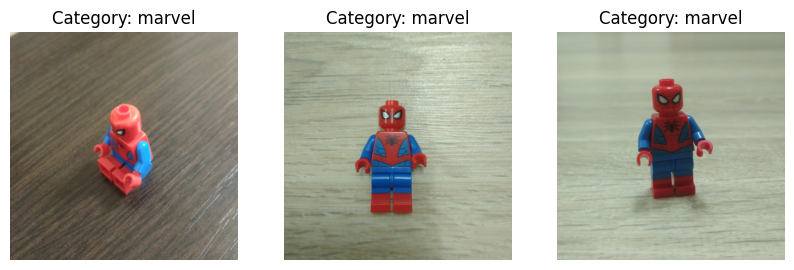

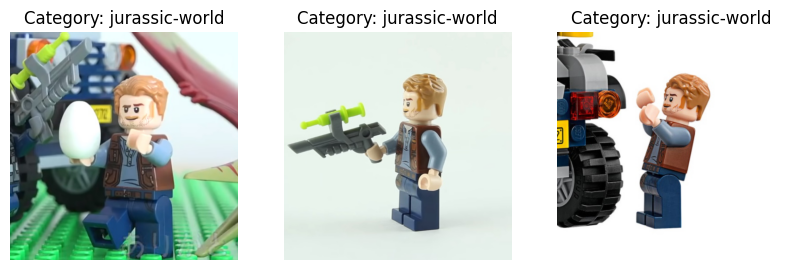

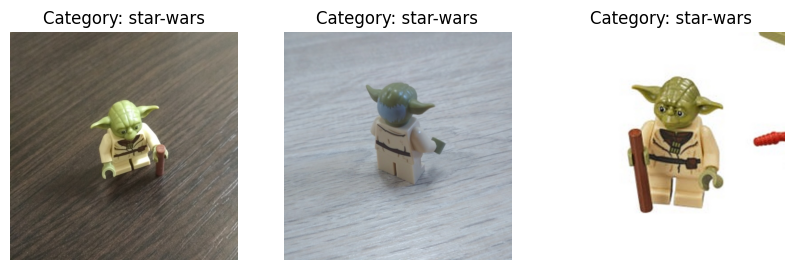

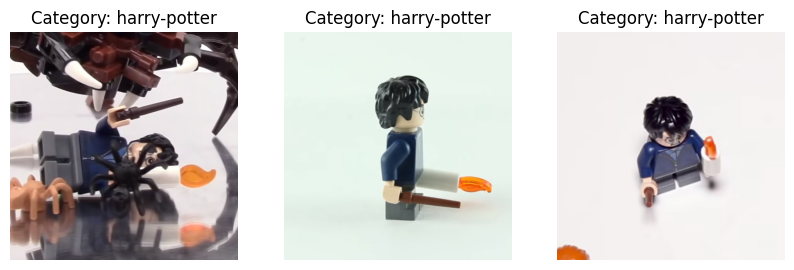

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

num_samples = 3

for category in categories:
    category_first_subfolder_path = os.path.join(dataset_path, category, '0001')
    image_file_names = os.listdir(category_first_subfolder_path)[:num_samples]




    plt.figure(figsize=(10, 4))
    for i, image_file_name in enumerate(image_file_names):
        image_path = os.path.join(category_first_subfolder_path, image_file_name)
        image = Image.open(image_path) #stavi bitove slike u odgovarajuci bafer u operativnoj memoriji

        plt.subplot(1, num_samples, i + 1) #prva dva argumenta su grid, treci je pozicija u gridu
        plt.imshow(image)
        plt.title(f"Category: {category}")

        plt.axis('off')
    plt.show()

**Vizualizacija distribucije broja slika po kategorijama**

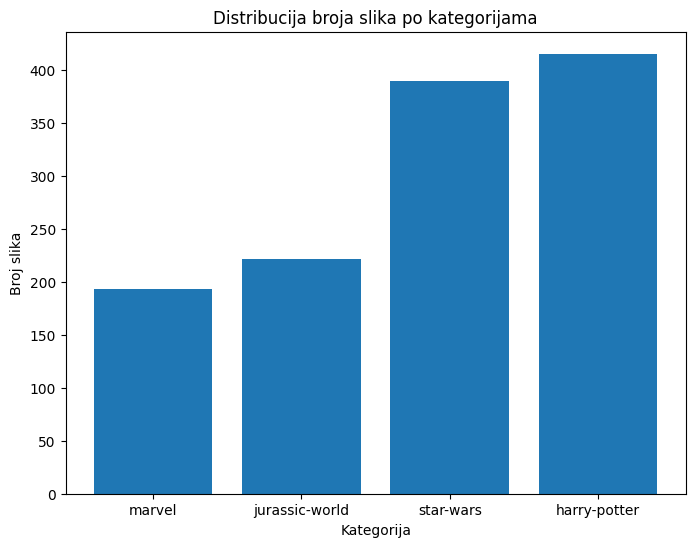

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(categories, image_counts)
plt.xlabel('Kategorija')
plt.ylabel('Broj slika')
plt.title('Distribucija broja slika po kategorijama')
plt.show()


** Augmentacija u cilju balansiranja dataset-a **

In [ ]:
def get_category(file_path):
    category="none"
    if "harry-potter" in file_path:
      category="harry-potter"
    elif "jurassic-world" in file_path:
      category="jurassic-world"
    elif "marvel" in file_path:
      category="marvel"
    else:
       category="star-wars"
    return category


def get_file_paths(input_folder):
    file_paths = []  # List to store the file paths
    categories = []
    # Iterate over all files and subdirectories in the input folder
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            file_path = os.path.join(root, file)
            if ".jpg" in file_path:
               file_paths.append(file_path)
               category=get_category(file_path)
               categories.append(category)

    return file_paths, categories


In [ ]:
import os
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import glob

if false :

  # Define the input and output directories
  input_folders = ["/content/drive/MyDrive/project/jurassic-world", "/content/drive/MyDrive/project/marvel"]  # Directories containing the original images
  output_folders = ["/content/drive/MyDrive/project/augmented/jurassic-world", "/content/drive/MyDrive/project/augmented/marvel"]  # Directories to save the augmented images

  # Define the augmentation techniques
  augmenter = iaa.Sequential([
      iaa.Flipud(0.5),  # Flip images vertically with a probability of 0.5
      iaa.Affine(rotate=(-20, 20)),  # Rotate images by -20 to +20 degrees
      iaa.GaussianBlur(sigma=(0, 1.0))  # Apply Gaussian blur with sigma between 0 and 1.0
  ])

  # Iterate through the input folders and perform augmentation
  for input_folder, output_folder in zip(input_folders, output_folders):
      os.makedirs(output_folder, exist_ok=True)


      image_file_paths,categories = get_file_paths(input_folder)


    #image_file_paths = glob.glob(os.path.join(input_folder, "*.*"))

    # Augment and save the images
      for image_file_path in image_file_paths:
        # Read the image
        image = cv2.imread(image_file_path)

        # Apply augmentation
        augmented_image = augmenter.augment_image(image)

        # Get the output file path
        output_file_path = os.path.join(output_folder, os.path.basename(image_file_path))

        # Save the augmented image
        cv2.imwrite(output_file_path, augmented_image, [cv2.IMWRITE_JPEG_QUALITY, 100])


 ** Ekstakcija feature-a (osobina) dataseta **

Feature-om se može smatrati svaki merljivi podatak koji opisuje dataset i koji se koristi kao input za AI algoritam tj pravljenje modela





In [ ]:
import cv2
import numpy as np

def extract_pixel_values(image):
    # Flatten the image into a 1D array of pixel values
    pixel_values = image.flatten()
    return pixel_values

def extract_color_histogram(image):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate the histogram of the hue channel
    hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    # parametri funckije : prvi ocigledan, None znaci nema maske odnosno dela slike koji se posebno razmatra, [0] znaci prvi kanal, [256] znaci 256 bits i onaj niz govori kad bude rasporedjivao piksele po bitovima, gledaj svih 256 bitova
    # podsednik: kanal: to je vrednost inteziteta boje svakog piksela u odnosu na jednu komponentu kolor sistema, npr R G ili B u RGB sistemu. bit to je interval inteziteta piksela.
    hist = cv2.normalize(hist, hist).flatten()
    # sta se ovde desava? normalizacija znaci da svaku vrednost histograma svedes na interval (0 ili 1) dakle samo podelis sa nekim brojem.
    # hist hist znaci ulazni niz je hist izlazni hist i na kraju sve stavi u 1d niz.

    return hist






Primena prethodno definisanih funkcija na dataset

In [ ]:
# Iterate over your dataset and extract features from each image

input_folder = r'/content/drive/MyDrive/project'
image_paths,labels = get_file_paths(input_folder)

print(image_paths)

pixel_values_array = []
color_histograms_array = []
features = []
for image_path in image_paths:
    image = cv2.imread(image_path)

    # Extract pixel values
    pixel_values = extract_pixel_values(image)
    pixel_values_array.append(pixel_values)

    # Extract color histogram
    color_histogram = extract_color_histogram(image)
    color_histograms_array.append(color_histogram)

    feature = np.concatenate([pixel_values, color_histogram])
    features.append(feature)


features = np.array(features)
pixel_values_array = np.array(pixel_values_array)
color_histograms_array = np.array(color_histograms_array)


['/content/drive/MyDrive/project/star-wars/0016/003.jpg', '/content/drive/MyDrive/project/star-wars/0016/008.jpg', '/content/drive/MyDrive/project/star-wars/0016/005.jpg', '/content/drive/MyDrive/project/star-wars/0016/002.jpg', '/content/drive/MyDrive/project/star-wars/0016/006.jpg', '/content/drive/MyDrive/project/star-wars/0016/009.jpg', '/content/drive/MyDrive/project/star-wars/0016/004.jpg', '/content/drive/MyDrive/project/star-wars/0016/001.jpg', '/content/drive/MyDrive/project/star-wars/0016/007.jpg', '/content/drive/MyDrive/project/star-wars/0014/009.jpg', '/content/drive/MyDrive/project/star-wars/0014/007.jpg', '/content/drive/MyDrive/project/star-wars/0014/002.jpg', '/content/drive/MyDrive/project/star-wars/0014/006.jpg', '/content/drive/MyDrive/project/star-wars/0014/008.jpg', '/content/drive/MyDrive/project/star-wars/0014/003.jpg', '/content/drive/MyDrive/project/star-wars/0014/001.jpg', '/content/drive/MyDrive/project/star-wars/0014/005.jpg', '/content/drive/MyDrive/projec

** Data splitting - rasporedjivanje podataka na validacione i one za trening modela **

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training, validation,
X_train, X_val, y_train, y_val= train_test_split(features, labels, test_size=0.2, random_state=42)



** Pravljenje SVM modela **

In [ ]:
from sklearn import svm
# Create an SVM model
svm_model = svm.SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

RF model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.7047619047619048


In [ ]:
val_accuracy = svm_model.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.6190476190476191


Validacija
